<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/NEW_MSSC_L02_Critical_Initial_2_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

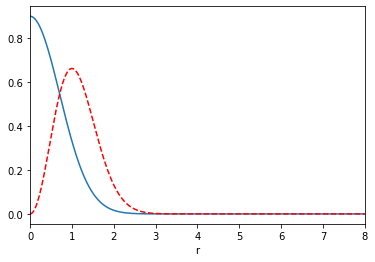

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 30                                                   # Truncation ordem

L0 = 2                                               # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)             

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)                                    

r0 = 0


A0 = 0.9  # 0.935155201739-> disperse ; 0.9351552017139; # 0.935155201714  -> colapse       

sigma = 1

Phi_0 = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))          # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*np.exp((-rplot**2)/(sigma**2))       


Phiplot = np.dot(a0, psiplot)


erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phi_plot0, rplot, Phiplot, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()

In [27]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001
  
Chi=np.dot(c0,psi)    
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)     

H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

inv_JH = np.linalg.inv(JH)

N_int = 50

tol = 1e-40    # tolerance

# Newton Raphson loop
for i in range(N_int):
  Chi=np.dot(c0,psi)
  rChi=np.dot(c0,rpsi)
  rrChi=np.dot(c0,rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2
  JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi
  cnew = c0 - np.dot(H0, inv_JH)
  if min(abs(cnew-c0)) < tol:
    break
#  print(min(abs(cnew-c0)), end=' ')
  c0 = cnew

#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()

In [28]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


# Base functions for Beta

SB2 = np.zeros([N+2,N+1])      
rSB2 = np.zeros([N+2,N+1])
rrSB2 = np.zeros([N+2,N+1])

for i in range(N+1+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)

    

In [29]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
qrSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
qrrSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

psi_0 = np.zeros(N+1)
rpsi_0 = np.zeros(N+1)


for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2  

Alphacenter = (-1)**(np.arange(N+1))

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)

In [ ]:
Alphacenter

array([ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1])

In [ ]:
2*rChi[1:N+1]*SB1[1:N+1,:] + rSB1[1:N+1,:] + 3/r[1:N+1]*SB1[1:N+1,:]

ValueError: ignored

In [ ]:
2*rChi[1:N+1]*SB1[:,1:N+1]

array([[-1.38807669e-04, -4.63942187e-04, -1.08622070e-03,
        -2.09021509e-03, -3.54925184e-03, -5.52387133e-03,
        -8.05968222e-03, -1.11865557e-02, -1.49169859e-02,
        -1.92459714e-02, -2.41461017e-02, -2.95208990e-02,
        -3.49710545e-02, -3.93413702e-02, -4.06830044e-02,
        -3.74328243e-02, -3.00991661e-02, -2.15299228e-02,
        -1.51119921e-02, -1.24791622e-02, -1.27083524e-02,
        -1.34354071e-02, -1.27025123e-02, -1.00783573e-02,
        -6.49113793e-03, -3.25791828e-03, -1.18014010e-03,
        -2.61434461e-04, -2.27871471e-05, -9.92161228e-08],
       [-2.72110916e-04, -8.86661075e-04, -2.00185307e-03,
        -3.67134397e-03, -5.86505898e-03, -8.46306187e-03,
        -1.12551337e-02, -1.39494068e-02, -1.61863099e-02,
        -1.75604345e-02, -1.76431230e-02, -1.59909082e-02,
        -1.21453198e-02, -5.87996855e-03,  2.02851088e-03,
         9.30907210e-03,  1.33953891e-02,  1.37139860e-02,
         1.24307349e-02,  1.24791622e-02,  1.48368405e-

In [ ]:
np.shape(SB1)

(31, 31)

In [ ]:
# Runge Kutta 4th order

h = 0.001   # step size
tf = 4

It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0


Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []


V = 0



#matriz = np.concatenate((array1, array2))

while t <= tf:
 
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi[1:N+1]*SB1[1:N+1,:] + rSB1[1:N+1,:] + 3/r[1:N+1]*SB1[1:N+1,:] 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1])
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[0] + 2*coeforigin - np.exp(4*Chi[0]) * Pi[0]**2*psi[0,:]
  Matrix_Alpha_int = rrpsi[1:N+1,:] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[1:N+1,:] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[1:N+1,:] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[1:N+1,:] 
  Matrix_Alpha = np.concatenate(Matrix_Alpha_0, Matrix_Alpha_int)
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alphac = 1 + np.dot(al0,Alphacenter)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[1:N+1,:] - SB2[1:N+1,:]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*coeforigin*a0 + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.concatenate(db_origin, db_int), inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_origin.append(1 + np.dot(al0, psi_0))
#  print(Alpha_origin)
  
  # Phi origin:  
  phi_origin.append(np.dot(a0, psi_0))
#  print(phi_origin)
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
  print(t)
    
#  if t > 9:
#    h=0.0001

    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
  
  
t1 = np.linspace(0, tf, len(Alpha_origin)) 

In [ ]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")   
plt.legend() 

In [ ]:
plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
plt.xlim(7.2,8.2)
plt.legend() 

In [ ]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.title("log(L2HC) para $N = 600$, $L_0 = 2$ e A_0 = {:}".format(A0))